import numpy as np
import torch
from transformers import AutoModel, AutoTokenizer, RobertaForSequenceClassification

In [15]:
import numpy as np
import pandas as pd
import torch
from transformers import AutoModel, AutoTokenizer, RobertaForSequenceClassification

In [16]:
# load pre trained model
model = RobertaForSequenceClassification.from_pretrained("wonrax/phobert-base-vietnamese-sentiment")

# load Tokenizer từ model (dùng để tách từ trong câu)
tokenizer = AutoTokenizer.from_pretrained("wonrax/phobert-base-vietnamese-sentiment", use_fast=False)

In [17]:
# test câu
sentence = 'Hôm nay tôi vui quá'

# tách câu thành list từng từ
input_ids = torch.tensor([tokenizer.encode(sentence)])

with torch.no_grad():
    out = model(input_ids)
    # predict output bằng pretrained model
    out = pd.Series(out.logits.softmax(dim=-1).tolist()[0], index= ['NEG', 'POS', 'NEU'])
    print(out)

NEG    0.001954
POS    0.983226
NEU    0.014820
dtype: float64


In [18]:
# test câu
sentence = 'phim này dở quá'

# tách câu thành list từng từ
input_ids = torch.tensor([tokenizer.encode(sentence)])

with torch.no_grad():
    out = model(input_ids)
    # predict output bằng pretrained model
    out = pd.Series(out.logits.softmax(dim=-1).tolist()[0], index= ['NEG', 'POS', 'NEU'])
    print(out)

NEG    0.987807
POS    0.004836
NEU    0.007358
dtype: float64


In [19]:
df = pd.read_csv("D:\Files\Data Gen 8\Diagnostic Analytics\Class 9 Final Project\Final Project\comments_df.csv")
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_12000\400843495.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:\Files\Data Gen 8\Diagnostic Analytics\Class 9 Final Project\Final Project\comments_df.csv")


,Unnamed: 0,_id,ranking,layer,user_id,like,user_email,comment_on,ip,user_fullname,...,content,reviewer,report_count,review_status,timestamp,device,report_reason,dislike,comment_status,device_id
0,0,555466761a77ce5d65ea062a,0,0,12,1,hoaianh2210@gmail.com,event,NaN,Nguyễn Hoài Anh,...,"Chương trình \ Tuyệt cú mèo\ luôn, chờ lâu rồi...",gianpt,0,1,1431595030,web-playfpt,[],0,0,NaN
1,1,555457bf1a77ce5d65ea0617,0,0,130,5,gian.phan@gmail.com,event,NaN,Phan Thanh Gian,...,Chờ đợi chương trình này đã lâu! Hẹn mọi người...,gianpt,0,1,1431591263,web-playfpt,[],0,0,NaN
2,2,555413001a77ce5d65ea0609,0,0,527201,0,cloudytang@gmail.com,vod,42.116.8.164,Đàm Ngọc Vân,...,comment cai,vuluc88,0,1,1431573662,android,[],0,2,983b5151a74de256
3,3,555357f71a77ce5d65ea0606,0,0,424467,1,n_x_cuong@yahoo.com,vod,NaN,nguyen xuan cuong,...,"lồng tiếng mà như tập đọc, nghe không nuốt nổi...",vuluc88,0,1,1431525776,web-playfpt,[],0,0,NaN
4,4,555491181a77ce5d65ea0636,0,0,805,12,lequy1579@gmail.com,vod,42.117.66.148,Quang Quỳnh Lê,...,Phim rất hay ;),vuluc88,0,1,1431605947,android,[],0,0,2e190e1227743c0d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885164,885164,627543d15e052026df2928c6,0,0,14734162,0,2464570237147555@gmail.com,NaN,171.248.252.59,Thanhlai Do,...,"phim nhẹ nhàng dễ thương, ko có gì gây cấn ...",NaN,0,0,1651852489,android,[],0,0,7c289e7c47024cf2
885165,885165,6136ee5e5e0520b679234d52,0,0,11069002,0,1309977539145194@gmail.com,NaN,115.76.163.113,Duyên Võ,...,"hay lắm bạn, xem đi ko uổng đâu",NaN,0,0,1630990048,android,[],0,0,532c091ad40b61e0
885166,885166,627a3dc95e052026df2928c9,0,0,19094650,0,120071949710691@gmail.com,NaN,171.251.235.36,captain_miao,...,Năm nay thấy đội nào đá cũng hay Myanmar hay M...,NaN,0,0,1652178628,android,[],0,0,3249da3bf889a14c
885167,885167,627e52f45e052026df2928ce,0,0,19094650,0,120071949710691@gmail.com,NaN,171.251.235.47,captain_miao,...,U23 Myanmar đá k khác gì như Indo có điều ít c...,NaN,0,0,1652446178,android,[],0,0,3249da3bf889a14c


In [20]:
# hàm apply để đánh giá từng comment
def sentiment(sentence):
  try:
    input_ids = torch.tensor([tokenizer.encode(sentence)])
  except:
    return 2

  if input_ids.shape[1] > tokenizer.model_max_length:
    return 2

  with torch.no_grad():
      out = model(input_ids)
      return np.argmax(out.logits.softmax(dim=-1).tolist()[0])


In [22]:
import time
start_time = time.time()
# test 10000 first comments
test = df[:1000]
test['sentiment'] = test['content'].apply(sentiment)

print("--- %s seconds ---" % (time.time() - start_time))

--- 127.49227499961853 seconds ---


C:\Users\Admin\AppData\Local\Temp\ipykernel_12000\3484624448.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sentiment'] = test['content'].apply(sentiment)


In [23]:
test[['user_id','content','sentiment']]

,user_id,content,sentiment
0,12,"Chương trình \ Tuyệt cú mèo\ luôn, chờ lâu rồi...",1
1,130,Chờ đợi chương trình này đã lâu! Hẹn mọi người...,1
2,527201,comment cai,1
3,424467,"lồng tiếng mà như tập đọc, nghe không nuốt nổi...",0
4,805,Phim rất hay ;),1
...,...,...,...
995,532136,dở quá chịu ko nỗi,0
996,372844,coi phim buồn mấy cũng phải cười vỡ bụng,0
997,132963,"hayvbnnnmmm,",1
998,549986,K biết bao h` mới có tập mới đây. Hỏi thì adm ...,0


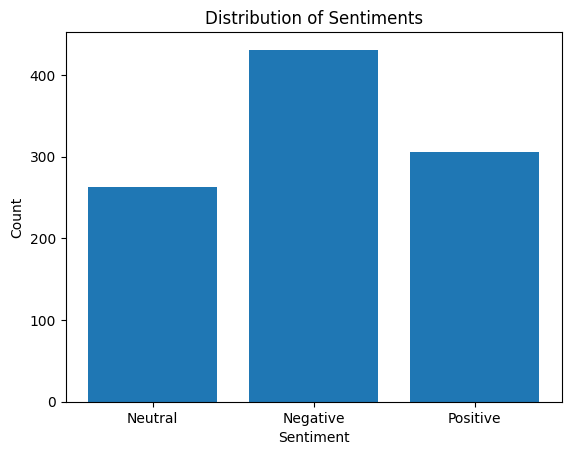

In [24]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment label
sentiment_counts = test['sentiment'].value_counts()

# Create a bar chart
plt.bar(sentiment_counts.index, sentiment_counts.values)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')

# Add sentiment labels to x-axis
plt.xticks(sentiment_counts.index, ['Negative', 'Positive', 'Neutral'])

# Show plot
plt.show()

In [14]:
#lưu kết quả
test.to_csv('test.csv', index= False)